In [1]:
import numpy as np
import sys
sys.path.append('/home/hcleroy/PostDoc/aging_condensates/Simulation/Parallel_Simulation')
from Data_Treatement import *
import matplotlib.pyplot as plt
import Reader
media = "/media/hcleroy/Simulation_Res/Parallel_Simulation_aging/fixed_density/"
from matplotlib import colormaps
cm = colormaps['viridis']
from scipy.special import erfc
import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["xtick.direction"] = "in"
matplotlib.rcParams["ytick.direction"] = "in"
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

In [2]:
file = Reader.CustomHDF5Reader(media+'mu5e_2'+'.hdf')
file.open()
print(file.list_measurements(file.list_groups()[0]))
file.close()

['Check_Time', 'Coarse_Time', 'Entropy', 'ISF', 'NRG', 'PCF', 'Time_shift', 'cluster', 'moves_1']


In [3]:
density = 'mu5e_2_'
Names = ['N2','N5','N10','N50']
pcfs = list()
for name in Names:
    print(name)
    pcfs.append(Data_Treatement(media+density+name+'.hdf',data_type='PCF'))
media_2 = "/media/hcleroy/Simulation_Res/Cluster/N/100/mu5e_2/"
file_2 = "E-15_N100_ell2E3_kdiffE-4.hdf"
pcfs.append(Data_Treatement(media_2+file_2,data_type='PCF'))


for pcf in pcfs:    
    pcf.average(log_scale=False,num_bins=100)


N2
N5
N10
N50


In [4]:
Peq = lambda r,ell_tot,a : 3*a**3/(2*np.pi*ell_tot*r)*erfc(np.sqrt(3/(2*a*ell_tot))*r)
avR = lambda L,a : np.sqrt(2/(3*np.pi)) * 4/3*a**(7/2)*L**0.5

In [13]:
pcfs[0].attributes['cluster_max_distance']

"{'Cluster': (<class 'Cluster.Cluster'>, (3.65,)), 'MSD': (<class 'MSD.MSD'>, ()), 'ISF': (<class 'ISF.ISF'>, (0.374, 10)), 'PCF': (<class 'PCF.PCF'>, (15, 50)), 'PCF_L': (<class 'PCF.PCF_L'>, (20, 30)), 'NRG': (<class 'Energy.NRG'>, ())}"

In [16]:
rho_0 = list()
for pcf in pcfs:
    #rho_0.append(pcf.attributes['Nlinker']/(4/3*np.pi*np.sqrt(pcf.attributes['ell_tot'])))
    rho_0.append(pcf.attributes['Nlinker']/(4/3*np.pi*15**3))
print(rho_0)

[0.0001414710605261292, 0.000353677651315323, 0.000707355302630646, 0.00353677651315323, 0.00707355302630646]


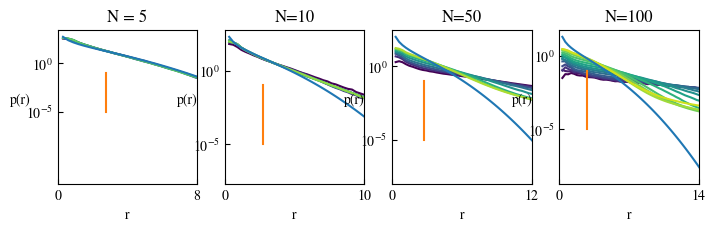

In [19]:
ell = [pcf.attributes['ell_tot'] for pcf in pcfs[1:]]
N = [pcf.attributes['Nlinker'] for pcf in pcfs[1:]]
title = ['N = 5','N=10','N=50','N=100']
ylim = [(10**-6,2*10**-1),(10**-6,2*10**-1),(10**-6,2*10**-1),(10**-6,2*10**-1)]
xlim = [(0,8),(0,10),(0,12),(0,14)]
#xlim = [(0,8),(0,8),(0,8),(0,8)]
ncol = pcfs.__len__()-1
fig,ax = plt.subplots(figsize=(8.27, 2),ncols=ncol)
i=0
x = np.linspace(0.1,15,100)
for pcf in pcfs[1:]:
    n=0
    for x,data in zip(pcf.binned_time,pcf.average_data):
        ax[i].plot(x,data/rho_0[i],color = cm(n/pcf.average_data.__len__()))
        n+=1
    ax[i].plot(x,Peq(x,ell[i]/N[i],1.)/rho_0[i])
    #ax[i].plot(x,Peq(x,ell[i],avR(ell[i]/N[i],1)))
    ax[i].plot([avR(ell[i]/N[i],1),avR(ell[i]/N[i],1)],[10**-5,10**-1])
    ax[i].set_yscale('log')
    ax[i].set_title(title[i])
    #ax[i].set_ylim(ylim[i])
    ax[i].set_xlim(xlim[i])
    ax[i].set_yticks([10**0,10**-5])
    ax[i].set_xticks(xlim[i])
    ax[i].set_xlabel('r')
    ax[i].set_ylabel('p(r)',rotation=0)
    ax[i].yaxis.set_minor_locator(plt.NullLocator())
    i+=1
#plt.savefig('pcf_n.svg',transparent=True,bbox_inches='tight')

In [ ]:
Names = ['N5','N50']
nrgs = list()
for name in Names:
    print(name)
    nrgs.append(Data_Treatement(media+density+name+'.hdf',data_type='NRG'))
for nrg in nrgs:
    nrg.average(log_scale=False,num_bins=100)

N5
N50


In [ ]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm

norm = mcolors.Normalize(vmin=0, vmax=10)


fig,ax1 = plt.subplots(figsize=(4,3))#,gridspec_kw={'width_ratios': [1, 1.2]})

x = np.linspace(0.1,15,100)

pcf1 = pcfs[1]
pcf2 = pcfs[-1]
viridis = cm.get_cmap('viridis')

n=0
for x,data in zip(pcf2.binned_time,pcf2.average_data):
    ax1.plot(x,data,color = viridis(n/pcf2.average_data.__len__()))
    n+=1
ax1.plot(x,Peq(x,2*10**3/100),color='black',linestyle='--',label='Analytic solution')
#ax[1].plot(x,Peq(x,10**3/25),color='black',linestyle=':')
ax1.set_yscale('log')
ax1.set_ylim(10**-7,10**-1)
ax1.set_xlim(0,10)
#ax1.set_title('$N_{linker} = 50$')
#a[].legend()#loc='upper left', bbox_to_anchor=(1.05, 1))
ax1.yaxis.set_minor_locator(plt.NullLocator())
ax1.set_yticks([10**-7,10**-5,10**-3,10**-1])

ax1.legend()
ax1.set_ylabel(r'$p(r)$',rotation=0)
ax1.set_xlabel(r'$r$')

ax = inset_axes(ax1, width="35%", height="35%", bbox_to_anchor=(-0.2,-0.2,1.,1.),bbox_transform = ax1.transAxes,loc='center')  # 30% of parent dimensions
n=0
for x,data in zip(pcf1.binned_time,pcf1.average_data):
    ax.plot(x,data,color = viridis(n/pcf1.average_data.__len__()))
    n+=1
ax.plot(x,Peq(x,10**2/5),color='black',linestyle='--',label='Analytic solution')
ax.set_yscale('log')
ax.set_ylim(10**-7,10**-1)
ax.set_xlim(0,10)
ax.set_title('$N_{linker} = 5$')
ax.yaxis.set_minor_locator(plt.NullLocator())
ax.set_yticks([10**-7,10**-1])
ax.set_xticks([0,10])
ax.set_ylabel(r'$p(r)$',rotation=0)
ax.set_xlabel(r'$r$')



# Add a colorbar to the figure
sm = cm.ScalarMappable(cmap=viridis, norm=norm)  # Create a ScalarMappable
sm.set_array([])  # We don't need any actual data here, just the color scale

# Add the colorbar to the plot
fig.colorbar(sm, ax=ax1, label=r'Time ($1/k_{ub}$)')  # Adjust the label as needed

#plt.savefig('pcf.svg',transparent=True,bbox_inches='tight')

NameError: name 'plt' is not defined